In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#Implementando rede neural de um percepton

# Percepton

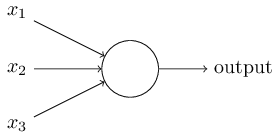

In [ ]:
class neuralNetwork(nn.Module):
  def __init__(self):
    #Inicia a rede neural, como é uma subclasse, vai rodar o inicializador da classe "nn.Module"
    super().__init__()

    #Inicializa pesos e bias já pre-treinados para o exemplo!
    self.layers = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
    )


    #Método que faz a propagação de informação da rede
  def forward(self, inputValue):
    return self.layers(inputValue)


In [ ]:
model = neuralNetwork()

entrada = torch.tensor([1], dtype = torch.float32)
saida = model.forward(entrada)
print(saida)

tensor([0.], grad_fn=<ReluBackward0>)


# Operações com tensores

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor([3,2,4])
c = a + b
d = a * b
e = a - b
print(c)
print(d)
print(e)

tensor([4, 4, 7])
tensor([ 3,  4, 12])
tensor([-2,  0, -1])


In [ ]:
tensorFloat = torch.tensor([1,2], dtype = torch.float32)
torch.view_as_complex(tensorFloat)

tensor(1.+2.j)

In [ ]:
tensorMultDimension = torch.tensor([[[1,2],[1,3]], [[3,6],[2,9]]])
tensorLinearizado = nn.Flatten(tensorMultDimension)
print(tensorMultDimension)

tensor([[[1, 2],
         [1, 3]],

        [[3, 6],
         [2, 9]]])


# DataSet e DataLoader

In [ ]:
class MyData(Dataset):
  def __init__(self, qtd):
    numeros = torch.randint(low = 0, high =100000, size = (qtd, ))
    self.data = [(i, 2*i) for i in numeros]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]


DataTrain = MyData(1000)
#DataTest = MyData(10)

In [ ]:
DataLoaderTrain = DataLoader(DataTrain, batch_size = 1, shuffle = True)
#DataLoaderTest = DataLoader(DataTest, batch_size = 1, shuffle = True)


# Modelo


In [ ]:
class classificadorXinfrim(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1, 1)
    )

  def forward(self, inputValues):
    return self.layers(inputValues)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = classificadorXinfrim().to(device)

In [ ]:
LossModel = torch.nn.MSELoss()
Optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# Treinamento


In [ ]:
def train(model, optimizer, lossFunc, dataload):
  model.train()
  epochs = 10
  for i in range(epochs):
    epochLoss = 0
    for entry, exit in DataLoaderTrain:
      entry = entry.float().to(device)
      exit = exit.float().to(device)

      prevision = model.forward(entry)
      loss = lossFunc(prevision, exit)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    print(f"Perda na época {i+1}:{ epochLoss}")

train(model, Optimizer, LossModel, DataLoaderTrain)


Perda na época 1:0
Perda na época 2:0
Perda na época 3:0
Perda na época 4:0
Perda na época 5:0
Perda na época 6:0
Perda na época 7:0
Perda na época 8:0
Perda na época 9:0
Perda na época 10:0


In [ ]:
entrada = torch.tensor([1], dtype = torch.float32)
saida = model.forward(entrada)
print(saida)

tensor([105261.8906], grad_fn=<ViewBackward0>)
